<a href="https://colab.research.google.com/github/jaybeberry9591/graph_theory_assignments/blob/main/dominant_clustering_without_null_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#all the modules need to be imported

In [ ]:
!pip install matplotlib-venn

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import numpy as np
import pandas as pd
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from numpy.linalg import norm

from sklearn.metrics import pairwise_distances, adjusted_mutual_info_score
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
import sklearn.svm as svm

In [ ]:
#csv file import and modifying the columns name
df = pd.read_csv("/content/drive/MyDrive/crime_boston.csv",encoding = 'windows-1252')
df.columns = df.columns.str.lower() # changing the columns name to work more easily

In [ ]:
#information regarding the csv file
df.shape

(319073, 17)

In [ ]:
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'shooting',
       'occurred_on_date', 'year', 'month', 'day_of_week', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of        incident_number  offense_code    offense_code_group  \
0           I182070945           619               Larceny   
1           I182070943          1402             Vandalism   
2           I182070941          3410                 Towed   
3           I182070940          3114  Investigate Property   
4           I182070938          3114  Investigate Property   
...                ...           ...                   ...   
319068   I050310906-00          3125       Warrant Arrests   
319069   I030217815-08           111              Homicide   
319070   I030217815-08          3125       Warrant Arrests   
319071   I010370257-00          3125       Warrant Arrests   
319072       142052550          3125       Warrant Arrests   

                        offense_description district reporting_area shooting  \
0                        LARCENY ALL OTHERS      D14            808      NaN   
1                                 VANDALISM      C11         

In [ ]:
df.head(20)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,9/3/2018 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,9/3/2018 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,9/3/2018 20:39,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,9/3/2018 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,9/3/2018 20:38,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [ ]:
df.isnull().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1765
reporting_area              0
shooting               318054
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                   90
street                  10871
lat                     19999
long                    19999
location                    0
dtype: int64

In [ ]:
df['occurred_on_date'] = pd.to_datetime(df['occurred_on_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   incident_number      319073 non-null  object        
 1   offense_code         319073 non-null  int64         
 2   offense_code_group   319073 non-null  object        
 3   offense_description  319073 non-null  object        
 4   district             317308 non-null  object        
 5   reporting_area       319073 non-null  object        
 6   shooting             1019 non-null    object        
 7   occurred_on_date     319073 non-null  datetime64[ns]
 8   year                 319073 non-null  int64         
 9   month                319073 non-null  int64         
 10  day_of_week          319073 non-null  object        
 11  hour                 319073 non-null  int64         
 12  ucr_part             318983 non-null  object        
 13  street        

In [ ]:
df.duplicated().sum()

23

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.shape

(319050, 17)

In [ ]:
df.drop_duplicates(subset= ['incident_number','offense_code'], inplace=True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.duplicated(['incident_number','offense_code'], keep = False).any()

False

In [ ]:
# summary of numerical ones
df.describe(include='number')

,offense_code,year,month,hour,lat,long
count,319037.000000,319037.000000,319037.000000,319037.000000,299039.000000,299039.000000
mean,2317.536248,2016.560719,6.609603,13.118121,42.214368,-70.908252
std,1185.310509,0.996299,3.273643,6.294283,2.159892,3.493822
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297424,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [ ]:
# summary of categorical ones
df.describe(include=['object']).T

,count,unique,top,freq
incident_number,319037,282517,I162030584,13
offense_code_group,319037,67,Motor Vehicle Accident Response,37132
offense_description,319037,241,SICK/INJURED/MEDICAL - PERSON,18783
district,317272,12,B2,49939
reporting_area,319037,879,,20250
shooting,1019,1,Y,1019
day_of_week,319037,7,Friday,48488
ucr_part,318948,4,Part Three,158534
street,308166,4657,WASHINGTON ST,14191
location,319037,18194,"(0.00000000, 0.00000000)",19998


In [ ]:
df.dropna(subset= ["lat"], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df = df.drop(df[df.lat < 30].index)
df.reset_index(drop=True, inplace = True)

In [ ]:
df[df['district'].isna()].head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
24,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
38,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
39,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"


In [ ]:
df.dropna(subset= ['district'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.dropna(subset= ['street'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.dropna(subset= ['shooting'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df[df['district'].isna()].head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location


In [ ]:
df[df['street'].isna()].head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location


In [ ]:
df[df['shooting'].isna()].head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location


In [ ]:
df.describe

<bound method NDFrame.describe of     incident_number  offense_code  offense_code_group  \
0        I182069509           413  Aggravated Assault   
1        I182068876           413  Aggravated Assault   
2        I182067317           111            Homicide   
3        I182067317          2662          Ballistics   
4        I182066420           413  Aggravated Assault   
..              ...           ...                 ...   
971      I152051161           413  Aggravated Assault   
972      I152051161          1503  Firearm Violations   
973      I152051161          3125     Warrant Arrests   
974      I152050961           413  Aggravated Assault   
975      I152050036           413  Aggravated Assault   

                             offense_description district reporting_area  \
0                 ASSAULT - AGGRAVATED - BATTERY      E18            540   
1                 ASSAULT - AGGRAVATED - BATTERY       B2            183   
2            MURDER, NON-NEGLIGIENT MANSLAUGHTER     

In [ ]:
df.shape

(976, 17)

In [ ]:
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
2,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,I152051161,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
972,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
973,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
974,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"


In [ ]:
df.reset_index(drop=True, inplace = True) # Reset index, in case I forgot to do it before when deleting rows
df_before_del_col = df.copy() # create a copy of the DF before dropping columns

In [ ]:
df_before_del_col

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
2,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,I152051161,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
972,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
973,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
974,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"


In [ ]:
df.drop('incident_number', axis = 1, inplace = True)
df.drop('offense_code', axis = 1, inplace = True)
df.drop('offense_description', axis = 1, inplace = True)
df.drop('reporting_area', axis = 1, inplace = True)
df.drop('occurred_on_date', axis = 1, inplace = True)
df.drop('year', axis = 1, inplace = True)
df.drop('street', axis = 1, inplace = True)
df.drop('location', axis = 1, inplace = True)

In [ ]:
df

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long
0,Aggravated Assault,E18,Y,8,Wednesday,23,Part One,42.250405,-71.131737
1,Aggravated Assault,B2,Y,8,Monday,22,Part One,42.321042,-71.072153
2,Homicide,B2,Y,8,Wednesday,15,Part One,42.315689,-71.089514
3,Ballistics,B2,Y,8,Wednesday,15,Part Two,42.315689,-71.089514
4,Aggravated Assault,A15,Y,8,Sunday,22,Part One,42.378085,-71.057841
...,...,...,...,...,...,...,...,...,...
971,Aggravated Assault,B2,Y,6,Saturday,0,Part One,42.317808,-71.066850
972,Firearm Violations,B2,Y,6,Saturday,0,Part Two,42.317808,-71.066850
973,Warrant Arrests,B2,Y,6,Saturday,0,Part Three,42.317808,-71.066850
974,Aggravated Assault,B2,Y,6,Friday,21,Part One,42.333584,-71.085543


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   offense_code_group  976 non-null    object 
 1   district            976 non-null    object 
 2   shooting            976 non-null    object 
 3   month               976 non-null    int64  
 4   day_of_week         976 non-null    object 
 5   hour                976 non-null    int64  
 6   ucr_part            971 non-null    object 
 7   lat                 976 non-null    float64
 8   long                976 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 68.8+ KB


In [ ]:
df.describe()

,month,hour,lat,long
count,976.000000,976.000000,976.000000,976.000000
mean,7.132172,13.507172,42.310696,-71.082747
std,3.198389,8.136524,0.023445,0.019744
min,1.000000,0.000000,42.236311,-71.167152
25%,5.000000,4.000000,42.293967,-71.091878
50%,7.000000,16.000000,42.312525,-71.081261
75%,10.000000,21.000000,42.325905,-71.070767
max,12.000000,23.000000,42.389572,-71.006921


In [ ]:
df.columns

Index(['offense_code_group', 'district', 'shooting', 'month', 'day_of_week',
       'hour', 'ucr_part', 'lat', 'long'],
      dtype='object')

In [ ]:
import os
lookup = {
    1: 'Night',
    2: 'Night',
    3: 'Night',
    4: 'Night',
    5: 'Night',
    6: 'Night',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'Morning',
    13:'Afternoon',
    14:'Afternoon',
    15:'Afternoon',
    16:'Afternoon',
    17:'Afternoon',
    18:'Afternoon',
    19:'Evening',
    20:'Evening',
    21:'Evening',
    22:'Evening',
    23:'Evening',
    0:'Evening'
}
for fname in os.listdir('.'):
    df['day_period'] = df['hour'].apply(lambda x: lookup[x])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   offense_code_group  976 non-null    object 
 1   district            976 non-null    object 
 2   shooting            976 non-null    object 
 3   month               976 non-null    int64  
 4   day_of_week         976 non-null    object 
 5   hour                976 non-null    int64  
 6   ucr_part            971 non-null    object 
 7   lat                 976 non-null    float64
 8   long                976 non-null    float64
 9   day_period          976 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 76.4+ KB


In [ ]:
df.head()

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long,day_period
0,Aggravated Assault,E18,Y,8,Wednesday,23,Part One,42.250405,-71.131737,Evening
1,Aggravated Assault,B2,Y,8,Monday,22,Part One,42.321042,-71.072153,Evening
2,Homicide,B2,Y,8,Wednesday,15,Part One,42.315689,-71.089514,Afternoon
3,Ballistics,B2,Y,8,Wednesday,15,Part Two,42.315689,-71.089514,Afternoon
4,Aggravated Assault,A15,Y,8,Sunday,22,Part One,42.378085,-71.057841,Evening


In [ ]:
lookup = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn'
}
for fname in os.listdir('.'):
    df['season'] = df['month'].apply(lambda x: lookup[x])

In [ ]:
df.head()

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long,day_period,season
0,Aggravated Assault,E18,Y,8,Wednesday,23,Part One,42.250405,-71.131737,Evening,Summer
1,Aggravated Assault,B2,Y,8,Monday,22,Part One,42.321042,-71.072153,Evening,Summer
2,Homicide,B2,Y,8,Wednesday,15,Part One,42.315689,-71.089514,Afternoon,Summer
3,Ballistics,B2,Y,8,Wednesday,15,Part Two,42.315689,-71.089514,Afternoon,Summer
4,Aggravated Assault,A15,Y,8,Sunday,22,Part One,42.378085,-71.057841,Evening,Summer


In [ ]:
lookup = {
    'Monday': 1,
    'Tuesday': 1,
    'Wednesday': 1,
    'Thursday': 1,
    'Friday': 1,
    'Saturday': 0,
    'Sunday': 0,
}
for fname in os.listdir('.'):
    df['weekday'] = df['day_of_week'].apply(lambda x: lookup[x])

In [ ]:
df.head()

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long,day_period,season,weekday
0,Aggravated Assault,E18,Y,8,Wednesday,23,Part One,42.250405,-71.131737,Evening,Summer,1
1,Aggravated Assault,B2,Y,8,Monday,22,Part One,42.321042,-71.072153,Evening,Summer,1
2,Homicide,B2,Y,8,Wednesday,15,Part One,42.315689,-71.089514,Afternoon,Summer,1
3,Ballistics,B2,Y,8,Wednesday,15,Part Two,42.315689,-71.089514,Afternoon,Summer,1
4,Aggravated Assault,A15,Y,8,Sunday,22,Part One,42.378085,-71.057841,Evening,Summer,0


In [ ]:
df.sample(10)

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long,day_period,season,weekday
184,Warrant Arrests,E13,Y,12,Wednesday,16,Part Three,42.315384,-71.098700,Afternoon,Winter,1
141,Aggravated Assault,D14,Y,2,Monday,23,Part One,42.350053,-71.147997,Evening,Winter,1
30,Aggravated Assault,B3,Y,7,Tuesday,11,Part One,42.289879,-71.089488,Morning,Summer,1
452,Homicide,C11,Y,4,Thursday,16,Part One,42.282624,-71.055330,Afternoon,Spring,1
136,Aggravated Assault,B2,Y,2,Saturday,21,Part One,42.323808,-71.089150,Evening,Winter,0
706,Homicide,B2,Y,6,Wednesday,0,Part One,42.307750,-71.082731,Evening,Summer,1
117,Firearm Violations,D4,Y,4,Friday,14,Part Two,42.336951,-71.085748,Afternoon,Spring,1
729,Aggravated Assault,D4,Y,5,Tuesday,22,Part One,42.339652,-71.074555,Evening,Spring,1
589,Aggravated Assault,B2,Y,10,Thursday,15,Part One,42.319968,-71.088596,Afternoon,Autumn,1
823,Aggravated Assault,B3,Y,12,Wednesday,17,Part One,42.286970,-71.072108,Afternoon,Winter,1


In [ ]:
df.drop('month', axis = 1, inplace = True)
df.drop('hour', axis = 1, inplace = True)
df.drop('day_of_week', axis = 1, inplace = True)

In [ ]:
df.to_csv('df_crimes_cleaned.csv')

In [ ]:
df = pd.read_csv('df_crimes_cleaned.csv', sep=",", index_col=0)
df.head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,Aggravated Assault,E18,Y,Part One,42.250405,-71.131737,Evening,Summer,1
1,Aggravated Assault,B2,Y,Part One,42.321042,-71.072153,Evening,Summer,1
2,Homicide,B2,Y,Part One,42.315689,-71.089514,Afternoon,Summer,1
3,Ballistics,B2,Y,Part Two,42.315689,-71.089514,Afternoon,Summer,1
4,Aggravated Assault,A15,Y,Part One,42.378085,-71.057841,Evening,Summer,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 975
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   offense_code_group  976 non-null    object 
 1   district            976 non-null    object 
 2   shooting            976 non-null    object 
 3   ucr_part            971 non-null    object 
 4   lat                 976 non-null    float64
 5   long                976 non-null    float64
 6   day_period          976 non-null    object 
 7   season              976 non-null    object 
 8   weekday             976 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 76.2+ KB


In [ ]:
df.isnull()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
971,False,False,False,False,False,False,False,False,False
972,False,False,False,False,False,False,False,False,False
973,False,False,False,False,False,False,False,False,False
974,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

offense_code_group    0
district              0
shooting              0
ucr_part              5
lat                   0
long                  0
day_period            0
season                0
weekday               0
dtype: int64

In [ ]:
df.dropna(subset= ['ucr_part'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df[df['ucr_part'].isna()].head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   offense_code_group  971 non-null    object 
 1   district            971 non-null    object 
 2   shooting            971 non-null    object 
 3   ucr_part            971 non-null    object 
 4   lat                 971 non-null    float64
 5   long                971 non-null    float64
 6   day_period          971 non-null    object 
 7   season              971 non-null    object 
 8   weekday             971 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 68.4+ KB


In [ ]:
df.isnull().sum()

offense_code_group    0
district              0
shooting              0
ucr_part              0
lat                   0
long                  0
day_period            0
season                0
weekday               0
dtype: int64

In [ ]:
df

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,Aggravated Assault,E18,Y,Part One,42.250405,-71.131737,Evening,Summer,1
1,Aggravated Assault,B2,Y,Part One,42.321042,-71.072153,Evening,Summer,1
2,Homicide,B2,Y,Part One,42.315689,-71.089514,Afternoon,Summer,1
3,Ballistics,B2,Y,Part Two,42.315689,-71.089514,Afternoon,Summer,1
4,Aggravated Assault,A15,Y,Part One,42.378085,-71.057841,Evening,Summer,0
...,...,...,...,...,...,...,...,...,...
966,Aggravated Assault,B2,Y,Part One,42.317808,-71.066850,Evening,Summer,0
967,Firearm Violations,B2,Y,Part Two,42.317808,-71.066850,Evening,Summer,0
968,Warrant Arrests,B2,Y,Part Three,42.317808,-71.066850,Evening,Summer,0
969,Aggravated Assault,B2,Y,Part One,42.333584,-71.085543,Evening,Summer,1


In [ ]:
df.describe(include='number')

,lat,long,weekday
count,971.000000,971.000000,971.000000
mean,42.310604,-71.082780,0.624099
std,0.023461,0.019733,0.484604
min,42.236311,-71.167152,0.000000
25%,42.293905,-71.091878,0.000000
50%,42.312508,-71.081310,1.000000
75%,42.325840,-71.070898,1.000000
max,42.389572,-71.006921,1.000000


In [ ]:
# summary of categorical ones
df.describe(include=['object']).T

,count,unique,top,freq
offense_code_group,971,26,Aggravated Assault,502
district,971,12,B2,333
shooting,971,1,Y,971
ucr_part,971,4,Part One,633
day_period,971,4,Evening,454
season,971,4,Summer,352


In [ ]:
# Preprocess categorical features using label encoding
label_encoder = LabelEncoder()

categorical_columns = ['offense_code_group', 'district', 'shooting', 'ucr_part', 'day_period', 'season']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Normalize numerical features (lat and long)
df[['lat', 'long']] = (df[['lat', 'long']] - df[['lat', 'long']].min()) / (df[['lat', 'long']].max() - df[['lat', 'long']].min())

In [ ]:
df

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,0,10,0,1,0.091967,0.221022,1,2,1
1,0,3,0,1,0.552855,0.592887,1,2,1
2,6,3,0,1,0.517931,0.484538,0,2,1
3,1,3,0,3,0.517931,0.484538,0,2,1
4,0,1,0,1,0.925049,0.682207,1,2,0
...,...,...,...,...,...,...,...,...,...
966,0,3,0,1,0.531753,0.625983,1,2,0
967,5,3,0,3,0.531753,0.625983,1,2,0
968,25,3,0,2,0.531753,0.625983,1,2,0
969,0,3,0,1,0.634690,0.509323,1,2,1


In [ ]:
df.head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,0,10,0,1,0.091967,0.221022,1,2,1
1,0,3,0,1,0.552855,0.592887,1,2,1
2,6,3,0,1,0.517931,0.484538,0,2,1
3,1,3,0,3,0.517931,0.484538,0,2,1
4,0,1,0,1,0.925049,0.682207,1,2,0


In [ ]:
df1 = df

In [ ]:
df1.head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,0,10,0,1,0.091967,0.221022,1,2,1
1,0,3,0,1,0.552855,0.592887,1,2,1
2,6,3,0,1,0.517931,0.484538,0,2,1
3,1,3,0,3,0.517931,0.484538,0,2,1
4,0,1,0,1,0.925049,0.682207,1,2,0


# Dominant set and pairwise clustering : Algorithom 1 (using svm)

In [ ]:
def compute_kernel(X, Y=None, metric='euclidean'):
    D = pairwise_distances(X, Y, metric=metric)
    gamma = np.std(X)
    D = D**2
    S = np.exp(-gamma * D)
    return S

In [ ]:
def dominant_set(A, x=None, epsilon=1.0e-4):
    """Compute the dominant set of the similarity matrix A with the
    replicator dynamics optimization approach. Convergence is reached
    when x changes less than epsilon.

    See: 'Dominant Sets and Pairwise Clustering', by Massimiliano
    Pavan and Marcello Pelillo, PAMI 2007.
    """
    if x is None:
        x = np.ones(A.shape[0]) / float(A.shape[0])

    distance = epsilon * 2
    while distance > epsilon:
        x_old = x.copy()
        # x = x * np.dot(A, x) # this works only for dense A
        x = x * A.dot(x)  # this works both for dense and sparse A
        x = x / x.sum()
        distance = norm(x - x_old)
        # print x.size, distance

    return x

In [ ]:
def ds_svm_clustering(X, n_clust=2, eta=2, ds_eps=2e-3, plot=False, metric='mahalanobis'):
    """Dominant set + SVM Clustering:
    Alg 1 in Unsupervised Action Discovery and Localization in Videos
    http://crcv.ucf.edu/papers/iccv17/Soomro_ICCV17.pdf
    Written by: Alireza Zaeemzadeh
    """
    if plot:
        plt.figure()
        if X.shape[1] == 2:
          # If there are only two features, use them for visualization
            for yi in np.unique(y):
                plt.plot(X[y==yi,0], X[y==yi,1], 'o')
        else:
        # If there is only one feature, plot it against the sample indices
                plt.plot(range(len(X)), X[:, 0], 'o')


        plt.title('Dataset')


    S = compute_kernel(X, metric=metric)

    spectral = SpectralClustering(n_clusters=n_clust, eigen_solver='arpack', affinity='precomputed')
    spectral.fit(S)
    labels = spectral.labels_

    if plot:
        plt.figure()
        for l in np.unique(labels):
            plt.plot(X[labels == l, 0], X[labels == l, 1], 'o')

        plt.title('Spectral Clustering')

    # finding dominant sets
    for l in np.unique(labels):
        idx_l = np.where(labels == l)
        X_l = X[labels == l, :]

        S_l = compute_kernel(X_l, metric=metric)

        x = dominant_set(S_l, epsilon=ds_eps)

        cutoff = np.median(x[x > 0])
        dom_idx = x > cutoff

        for i in idx_l[0][~dom_idx]:
            labels[i] = -1
    if plot:
        plt.figure()
        for yi in np.unique(labels):
            plt.plot(X[labels == yi, 0], X[labels == yi, 1], 'o')

        plt.title('Dominant set of each cluster (from spectral clustering)')

    dominant_set_idx = np.where(labels != -1)[0].tolist()
    non_dominant_set_idx = np.where(labels == -1)[0].tolist()
    while len(non_dominant_set_idx) > 0:
        remove_idx = []

        for l in np.unique(labels):

            if l == -1:
                continue

            if len(non_dominant_set_idx) == 0:
                break

            n_select = eta if len(non_dominant_set_idx) >= eta else len(non_dominant_set_idx)

            ovr_classes = [1 if labels[dominant_set_idx[i]] == l else -1 for i in range(len(dominant_set_idx))]

            clf = svm.SVC( kernel='precomputed', tol=1e-5)


            S = compute_kernel([X[i, :] for i in dominant_set_idx], metric=metric)

            clf.fit(S, ovr_classes)

            S = compute_kernel([X[i, :] for i in non_dominant_set_idx], [X[i, :] for i in dominant_set_idx],
                                   metric=metric)
            scores = clf.decision_function(S)

            new_idx_l = np.argsort(scores)[-n_select:]
            remove_idx.extend(new_idx_l)

            for i in new_idx_l:
                dominant_set_idx.append(non_dominant_set_idx[i])
                labels[non_dominant_set_idx[i]] = l

            for idx in sorted(remove_idx, reverse=True):
                # print idx
                del non_dominant_set_idx[idx]
            remove_idx = []

    if plot:
        plt.figure()
        for yi in np.unique(labels):
            plt.plot(X[labels == yi, 0], X[labels == yi, 1], 'o')

        plt.title('Dominant set + SVM Clustering')

    return labels

Adjusted Mutual Information Score: 0.0019062954750941167


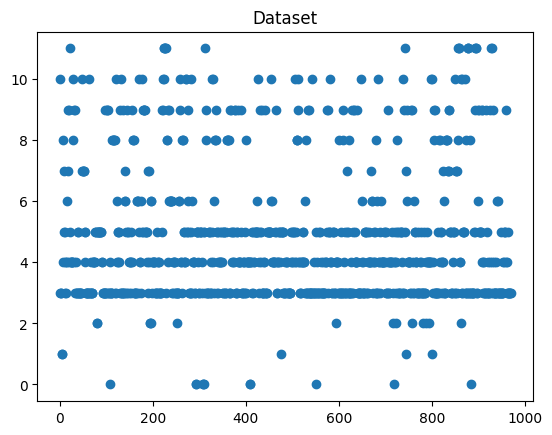

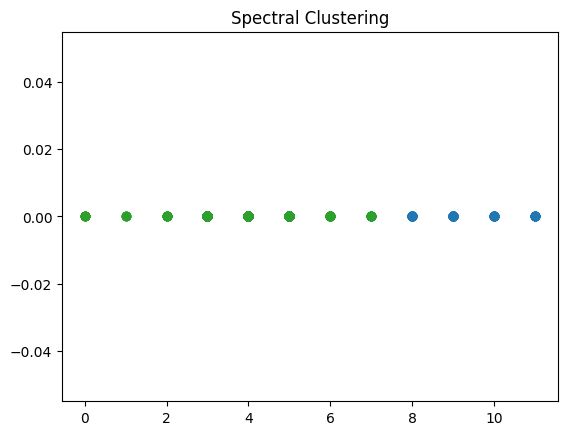

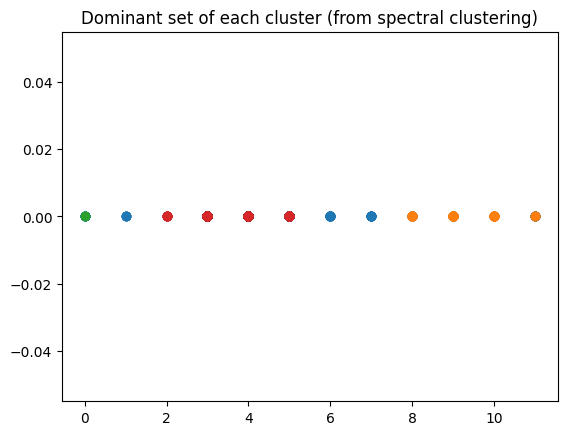

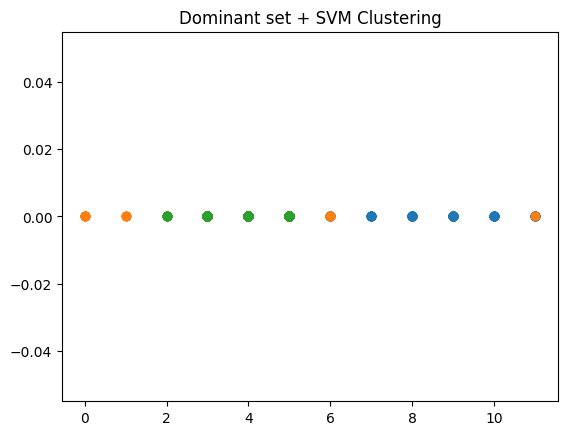

In [ ]:
if __name__ == '__main__':
    # np.random.seed(6)

    # nclust = 3
    # N = 1000    # number of samples
    # d = 2     # dimension of samples (number of features)
    # weights = np.ones(nclust)
    # weights /= sum(weights)

    # # X, y = make_classification(weights=weights.tolist(), n_classes=nclust, n_samples=N, n_features=d,
    # #                            n_redundant=0, class_sep=1, n_clusters_per_class=1, n_informative=d)

    # # X = data.iloc[:, :-1].values  # Assuming the features are in the first (n-1) columns
    # # y = data.iloc[:, -1].values   # Assuming the labels are in the last column

    # # # Calculate the inverse covariance matrix VI from your dataset X
    # # VI = np.linalg.inv(np.cov(X, rowvar=False))

    # # Assuming X is a 1-dimensional array, reshape it to a 2-dimensional array
    # X = np.reshape(X, (-1, 1))

    # # Calculate the inverse covariance matrix VI from your dataset X
    # VI = np.linalg.inv(np.cov(X, rowvar=False))

    # dist_metric = 'mahalanobis'  #cosine, euclidean, l1, l2, manhattan, mahalanobis
    # labels = ds_svm_clustering(X,  n_clust=nclust, plot=True, metric=dist_metric,VI=VI)
    # print ('Adjusted Mutual Information Score: ', adjusted_mutual_info_score(y, labels))
    # plt.show()


    np.random.seed(6)

    # Load your CSV dataset
    # Replace 'path_to_your_csv_file.csv' with the path to your CSV file

    # Extract features (X) and labels (y) from the CSV file
    # X = data.iloc[:, :-1].values  # Assuming the features are in the first (n-1) columns
    # # y = data.iloc[:, -1].values   # Assuming the labels are in the last column

    X = df.drop(columns=['offense_code_group']).values  # Features
    y = df['offense_code_group'].values  # Labels

    nclust = 3
    dist_metric = 'euclidean'  # Choose a different distance metric here
    labels = ds_svm_clustering(X, n_clust=nclust, plot=True, metric=dist_metric)
    print('Adjusted Mutual Information Score:', adjusted_mutual_info_score(y, labels))
    plt.show()

In [ ]:
import networkx as nx
import community
import community.community_louvain as community_louvain

In [ ]:
# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
graph.add_nodes_from(df1.index)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   offense_code_group  971 non-null    int64  
 1   district            971 non-null    int64  
 2   shooting            971 non-null    int64  
 3   ucr_part            971 non-null    int64  
 4   lat                 971 non-null    float64
 5   long                971 non-null    float64
 6   day_period          971 non-null    int64  
 7   season              971 non-null    int64  
 8   weekday             971 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 68.4 KB


In [ ]:
df1.head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,0,10,0,1,0.091967,0.221022,1,2,1
1,0,3,0,1,0.552855,0.592887,1,2,1
2,6,3,0,1,0.517931,0.484538,0,2,1
3,1,3,0,3,0.517931,0.484538,0,2,1
4,0,1,0,1,0.925049,0.682207,1,2,0


#Dominant set and pair wise clustering : Algorithm 2 (use networkX)

In [ ]:
def compute_similarity(row1, row2):
    # Numerical similarity (Euclidean distance)
    numerical_cols = ['lat', 'long', 'day_period', 'season', 'weekday']
    numerical_sim = np.sqrt(sum((row1[col] - row2[col]) ** 2 for col in numerical_cols))

    # Categorical similarity (Jaccard index)
    categorical_cols = ['offense_code_group', 'district', 'shooting', 'ucr_part']
    categorical_sim = sum(row1[col] == row2[col] for col in categorical_cols) / len(categorical_cols)

    # Combine and normalize the similarities
    total_sim = numerical_sim + categorical_sim
    normalized_sim = total_sim / (len(numerical_cols) + len(categorical_cols))

    return normalized_sim

In [ ]:
# Add edges to the graph based on pairwise similarities
for i, row1 in df1.iterrows():
    for j, row2 in df1.iterrows():
        if i != j:
            print(row1, row2)
            similarity = compute_similarity(row1, row2)  # Replace with your similarity function
            graph.add_edge(i, j, weight=similarity)

# Apply Louvain algorithm for community detection
partition = community_louvain.best_partition(graph)

# Print the clusters
for node, cluster_id in partition.items():
    print(f"Node {node}: Cluster {cluster_id}")

Streaming output truncated to the last 5000 lines.
Name: 757, dtype: float64
offense_code_group    0.000000
district              3.000000
shooting              0.000000
ucr_part              1.000000
lat                   0.491323
long                  0.567280
day_period            1.000000
season                2.000000
weekday               1.000000
Name: 970, dtype: float64 offense_code_group    6.000000
district              2.000000
shooting              0.000000
ucr_part              1.000000
lat                   0.969663
long                  0.934203
day_period            1.000000
season                1.000000
weekday               1.000000
Name: 758, dtype: float64
offense_code_group    0.000000
district              3.000000
shooting              0.000000
ucr_part              1.000000
lat                   0.491323
long                  0.567280
day_period            1.000000
season                2.000000
weekday               1.000000
Name: 970, dtype: float64 offense_

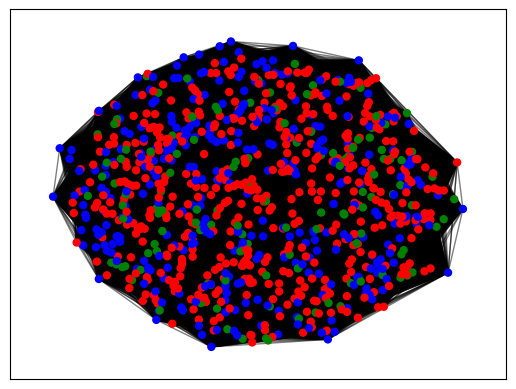

In [ ]:
# Create a color map for visualizing clusters
colors = ['r', 'g', 'b', 'y']  # Add more colors as needed
color_map = [colors[cluster_id] for cluster_id in partition.values()]

# Draw the graph with node colors representing clusters
pos = nx.spring_layout(graph)  # Adjust layout algorithm as needed
nx.draw_networkx_nodes(graph, pos, node_color=color_map, node_size=25)
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.show()

In [ ]:
data = df

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   offense_code_group  971 non-null    int64  
 1   district            971 non-null    int64  
 2   shooting            971 non-null    int64  
 3   ucr_part            971 non-null    int64  
 4   lat                 971 non-null    float64
 5   long                971 non-null    float64
 6   day_period          971 non-null    int64  
 7   season              971 non-null    int64  
 8   weekday             971 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 68.4 KB


#Dominant set and pairwise clustering : Algorithm 3

In [ ]:
from numpy.linalg import norm

def dominant_set(A, x=None, epsilon=1.0e-4):
    """Compute the dominant set of the similarity matrix A with the
    replicator dynamics optimization approach. Convergence is reached
    when x changes less than epsilon.

    See: 'Dominant Sets and Pairwise Clustering', by Massimiliano
    Pavan and Marcello Pelillo, PAMI 2007.
    """
    if x is None:
        x = np.ones(A.shape[0])/float(A.shape[0])

    distance = epsilon*2
    while distance > epsilon:
        x_old = x.copy()
        # x = x * np.dot(A, x) # this works only for dense A
        x = x * A.dot(x) # this works both for dense and sparse A
        x = x / x.sum()
        distance = norm(x - x_old)
        print (x.size, distance)

    return x

971 0.011306017133779163
971 0.00784379966620877
971 0.006255434418615334
971 0.005787397320671574
971 0.005512688856323758
971 0.0052833264627385485
971 0.005076096922519399
971 0.004890521110973076
971 0.004730003118536441
971 0.004596324702133333
971 0.004488569619444607
971 0.0044037986266451095
971 0.004338110009551975
971 0.004287469860914347
971 0.004248176841003995
971 0.0042170432022269255
971 0.004191416146338323
971 0.004169133029017025
971 0.00414846214319677
971 0.0041280504350199665
971 0.004106882774700625
971 0.004084250141546663
971 0.004059721965950337
971 0.004033118084474275
971 0.004004476851656017
971 0.003974017293442374
971 0.003942094565960999
971 0.003909149327919793
971 0.003875652889452415
971 0.0038420510764010755
971 0.003808710524369392
971 0.0037758714608953307
971 0.003743610849512346
971 0.003711819034858083
971 0.0036801918251445215
971 0.0036482384596660685
971 0.003615304380230108
971 0.0035806064034550047
971 0.00354327696082687
971 0.0035024136180

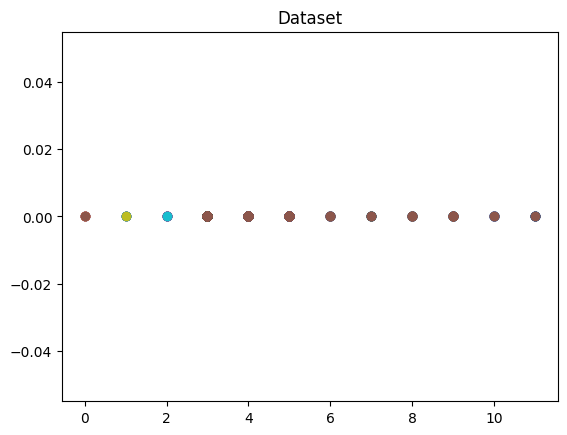

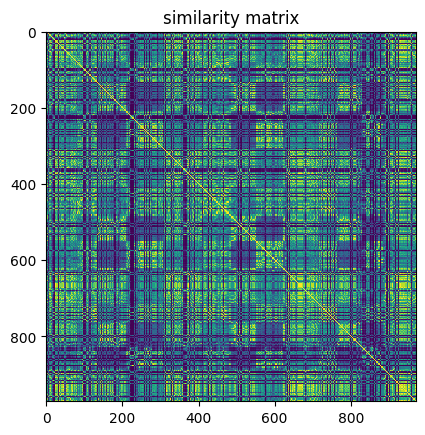

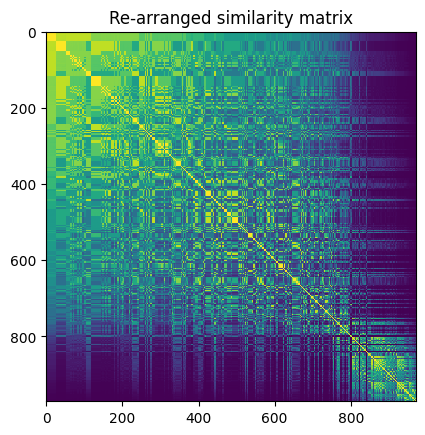

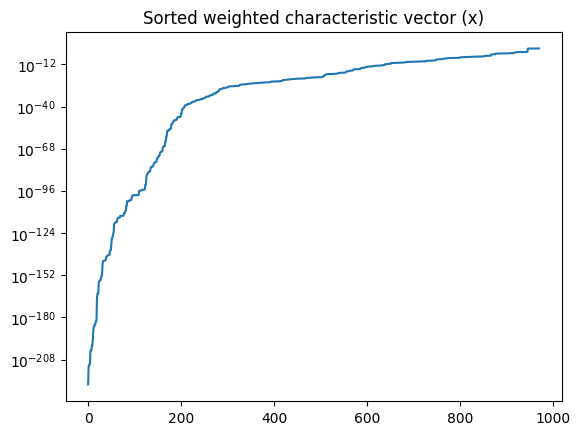

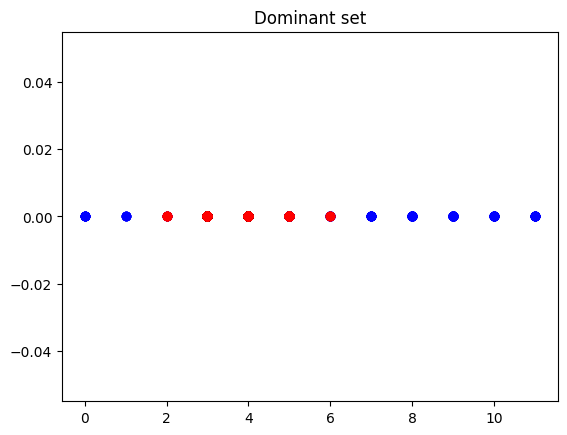

In [ ]:
if __name__=="__main__":

    from sklearn.metrics import pairwise_distances
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    np.random.seed(1)

    # n = 1000
    # d = 2

    # X, y = make_blobs(n, d, centers=3)

    X = data.drop(columns=['offense_code_group']).values  # Features
    y = data['offense_code_group'].values  # Labels

    D = pairwise_distances(X, metric='sqeuclidean')

    sigma2 = np.median(D)

    S = np.exp(-D / sigma2)

    x = dominant_set(S, epsilon=2e-4)

    if d==2:
        plt.figure()
        for yi in np.unique(y):
            plt.plot(X[y==yi,0], X[y==yi,1], 'o')

        plt.title('Dataset')

    plt.figure()
    plt.imshow(S, interpolation='nearest')
    plt.title('similarity matrix')

    idx = np.argsort(x)[::-1]
    B = S[idx,:][:,idx]
    plt.figure()
    plt.imshow(B, interpolation='nearest')
    plt.title('Re-arranged similarity matrix')
    plt.figure()
    plt.semilogy(np.sort(x))
    plt.title('Sorted weighted characteristic vector (x)')

    cutoff = np.median(x[x>0])
    print ("cutoff:", cutoff)
    plt.figure()
    plt.plot(X[x<=cutoff,0], X[x<=cutoff,1], 'bo')
    plt.plot(X[x>cutoff,0], X[x>cutoff,1], 'ro')
    plt.title("Dominant set")

    plt.show()

971 0.011306017133779163
971 0.00784379966620877
971 0.006255434418615334
971 0.005787397320671574
971 0.005512688856323758
971 0.0052833264627385485
971 0.005076096922519399
971 0.004890521110973076
971 0.004730003118536441
971 0.004596324702133333
971 0.004488569619444607
971 0.0044037986266451095
971 0.004338110009551975
971 0.004287469860914347
971 0.004248176841003995
971 0.0042170432022269255
971 0.004191416146338323
971 0.004169133029017025
971 0.00414846214319677
971 0.0041280504350199665
971 0.004106882774700625
971 0.004084250141546663
971 0.004059721965950337
971 0.004033118084474275
971 0.004004476851656017
971 0.003974017293442374
971 0.003942094565960999
971 0.003909149327919793
971 0.003875652889452415
971 0.0038420510764010755
971 0.003808710524369392
971 0.0037758714608953307
971 0.003743610849512346
971 0.003711819034858083
971 0.0036801918251445215
971 0.0036482384596660685
971 0.003615304380230108
971 0.0035806064034550047
971 0.00354327696082687
971 0.0035024136180

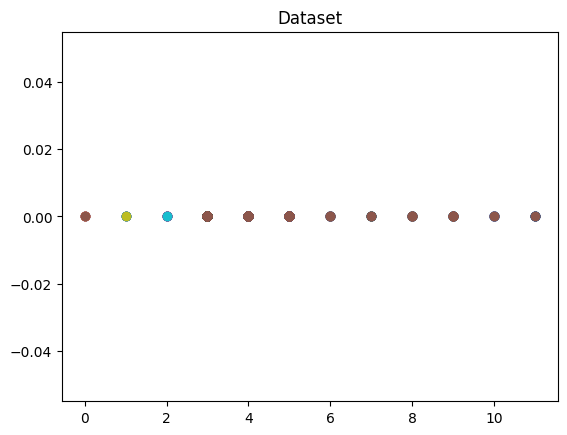

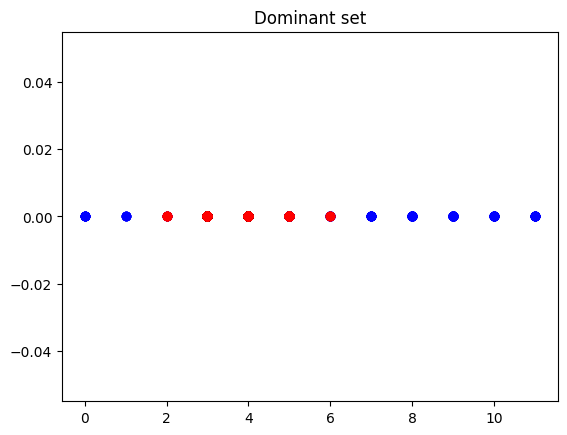

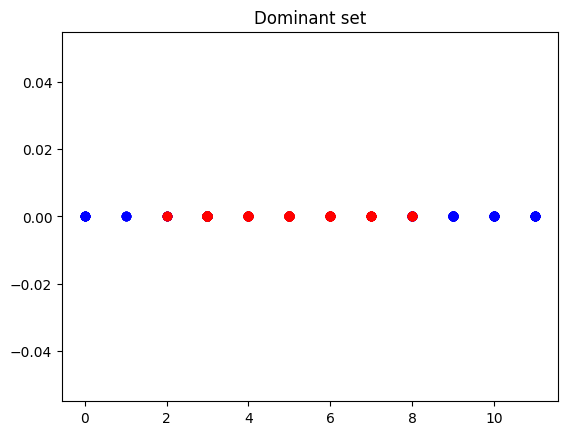

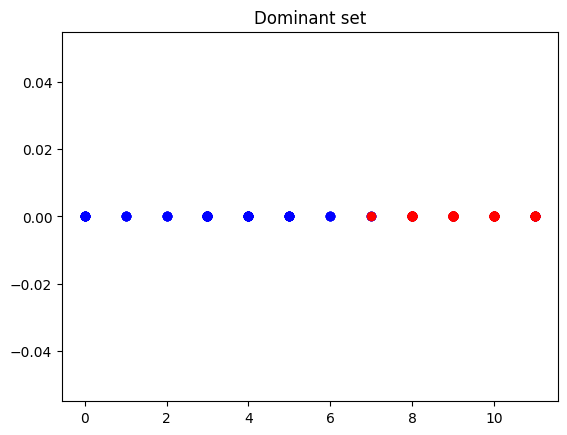

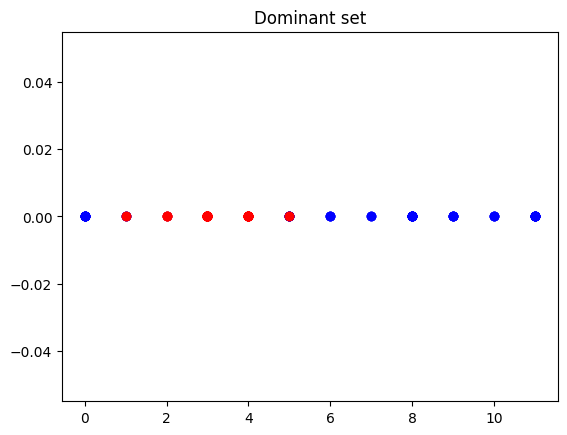

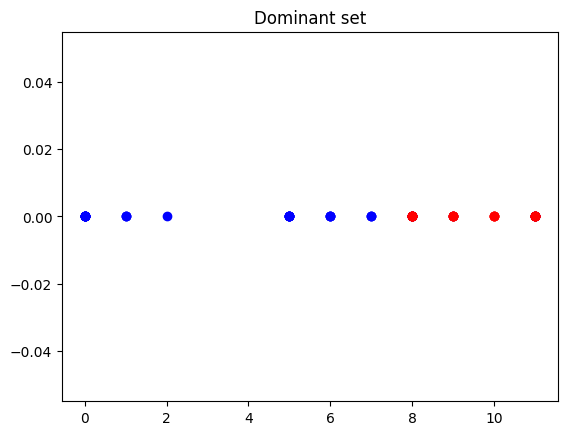

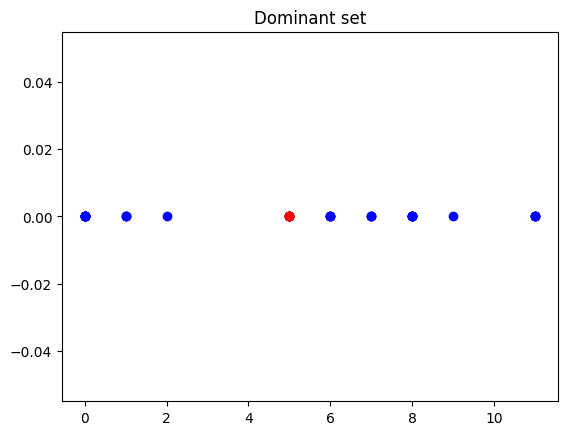

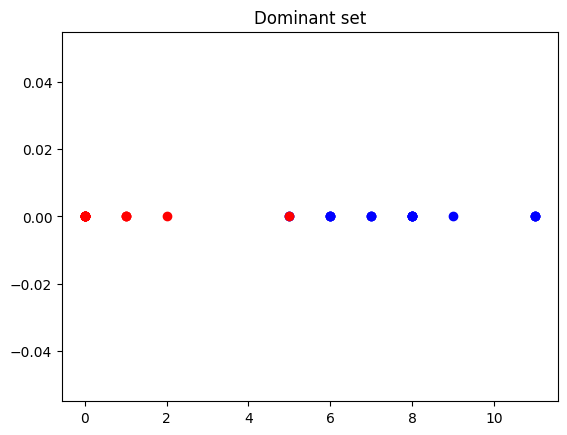

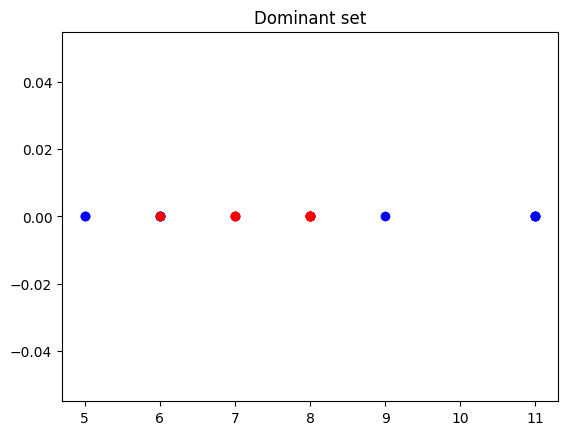

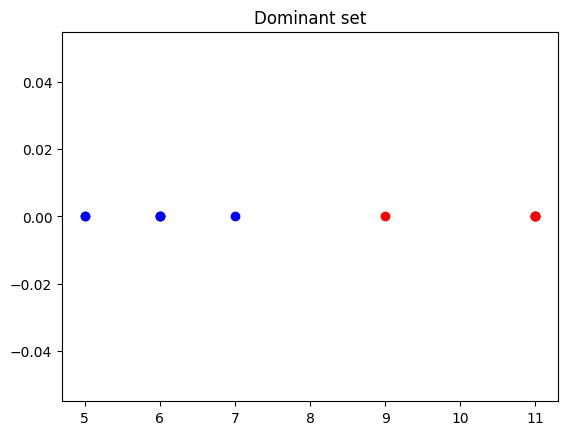

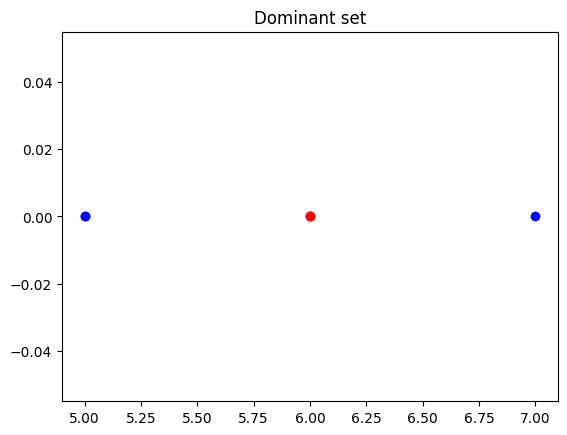

In [ ]:
if __name__ == '__main__':

    from sklearn.metrics import pairwise_distances
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    np.random.seed(1)

    # n = 1000
    # d = 2

    # X, y = make_blobs(n, d, centers=3)

    X = data.drop(columns=['offense_code_group']).values  # Features
    y = data['offense_code_group'].values  # Labels

    D = pairwise_distances(X, metric='sqeuclidean')

    sigma2 = np.median(D)

    S = np.exp(-D / sigma2)

    if d==2:
        plt.figure()
        for yi in np.unique(y):
            plt.plot(X[y==yi,0], X[y==yi,1], 'o')

        plt.title('Dataset')


    while S.size > 10:
        x = dominant_set(S, epsilon=2e-4)
        cutoff = np.median(x[x>0])

        plt.figure()
        plt.plot(X[x<=cutoff,0], X[x<=cutoff,1], 'bo')
        plt.plot(X[x>cutoff,0], X[x>cutoff,1], 'ro')
        plt.title("Dominant set")

        # remove the dominant set
        idx = x <= cutoff
        S = S[idx, :][:, idx]
        X = X[idx, :]

    plt.show()